# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [1]:
import pandas as pd
import plotly.express as px


# Notebook Presentation

In [2]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [5]:
df_apps = pd.read_csv('apps.csv')

In [ ]:
df_apps.shape

(10841, 12)

In [ ]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [ ]:
# The .sample(n) method will give us n random rows. This is another handy way to inspect our DataFrame.
df_apps.sample(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
1470,RETRO Shocked DW-6000,PERSONALIZATION,5.00,13,0.49,100,Paid,$1.49,Everyone,Personalization,"April 4, 2017",2.3 and up
5854,Magic Tiles - TWICE Edition (K-Pop),GAME,4.40,2351,62.00,"100,000",Free,0,Everyone,Music,"July 25, 2018",4.0 and up
10726,Viber Messenger,COMMUNICATION,4.30,11335255,3.50,"500,000,000",Free,0,Everyone,Communication,"July 18, 2018",Varies with device
4900,Calorie Counter - Macros,HEALTH_AND_FITNESS,4.00,3061,5.50,"100,000",Free,0,Everyone,Health & Fitness,"August 27, 2016",5.0 and up
4044,Phoenix and Arizona Cameras,TRAVEL_AND_LOCAL,4.10,134,5.30,"10,000",Free,0,Everyone,Travel & Local,"June 20, 2018",4.0.3 and up
8771,"KAYAK Flights, Hotels & Cars",TRAVEL_AND_LOCAL,4.50,216388,19.00,"10,000,000",Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device
8567,AppFinder by AppTap,TOOLS,2.00,2221,4.90,"5,000,000",Free,0,Everyone,Tools,"October 3, 2017",5.0 and up
5024,Puffin Browser Pro,COMMUNICATION,4.00,18247,3.50,"100,000",Paid,$3.99,Everyone,Communication,"July 5, 2018",4.1 and up
4532,NissanConnect® EV & Services,LIFESTYLE,2.30,853,88.00,"50,000",Free,0,Everyone,Lifestyle,"July 20, 2018",4.4 and up
1631,YourTube Video Views BG,VIDEO_PLAYERS,NaN,8,2.50,500,Free,0,Everyone,Video Players & Editors,"November 12, 2015",4.0 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [ ]:
# Dropping Unused Columns and Removing NaN Values
# To remove the unwanted columns, we simply provide a list of the column names ['Last_Updated', ‘Android_Ver']
# to the .drop() method. By setting axis=1 we are specifying that we want to drop certain columns.

In [6]:
df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True)

In [ ]:
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [7]:
nan_rows = df_apps[df_apps.Rating.isna()]
print(nan_rows.shape)
nan_rows.head()

(1474, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


In [8]:
df_apps_clean = df_apps.dropna() # We can drop the NaN values with .dropna()
df_apps_clean.shape # 10841 linhas - 1474 linhas(NaN) = 9367 linhas


(9367, 10)

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [9]:
duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
print(duplicated_rows)
duplicated_rows.head()

                                              App  ...            Genres
946                        420 BZ Budeze Delivery  ...           Medical
1133                                  MouseMingle  ...            Dating
1196   Cardiac diagnosis (heart rate, arrhythmia)  ...           Medical
1231                                 Sway Medical  ...           Medical
1247               Chat Kids - Chat Room For Kids  ...            Dating
...                                           ...  ...               ...
10802               Skype - free IM & video calls  ...     Communication
10809                                   Instagram  ...            Social
10826                                Google Drive  ...      Productivity
10832                                 Google News  ...  News & Magazines
10839                              Subway Surfers  ...            Arcade

[476 rows x 10 columns]


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [10]:
df_apps_clean[df_apps_clean.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
# So how do we get rid of duplicates? Can we simply call .drop_duplicates()?
# df_apps_clean = df_apps_clean.drop_duplicates()
# Not really. If we do this without specifying how to identify duplicates, we see that 3 copies of Instagram are retained
# because they have a different number of reviews. We need to provide the column names that should be used in the comparison
# to identify duplicates.
# Need to specify the subset for identifying duplicates

In [11]:

df_apps_clean = df_apps_clean.drop_duplicates(subset=['App', 'Type', 'Price'])
df_apps_clean[df_apps_clean.App == 'Instagram']


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [12]:
df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [13]:
df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [14]:
df_apps_clean.sort_values('Reviews', ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [ ]:
# Let’s take a look at the distribution of the content ratings in our dataset and see how to visualise it with plotly - a popular
# data visualisation library that you can use alongside or instead of Matplotlib.

In [15]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [ ]:
# The first step in creating charts with plotly is to import plotly.express as px.

In [16]:
fig = px.pie(labels=ratings.index, values=ratings.values)
fig.show()

In [ ]:
# .pie() documentation = https://plotly.com/python-api-reference/generated/plotly.express.pie.html
# If you’d like to configure other aspects of the chart, that you can’t see in the list of parameters, 
# you can call a method called .update_traces(). In plotly lingo, “traces” refer to graphical marks on a figure.
# Think of “traces” as collections of attributes. Here we update the traces to change how the text is displayed.

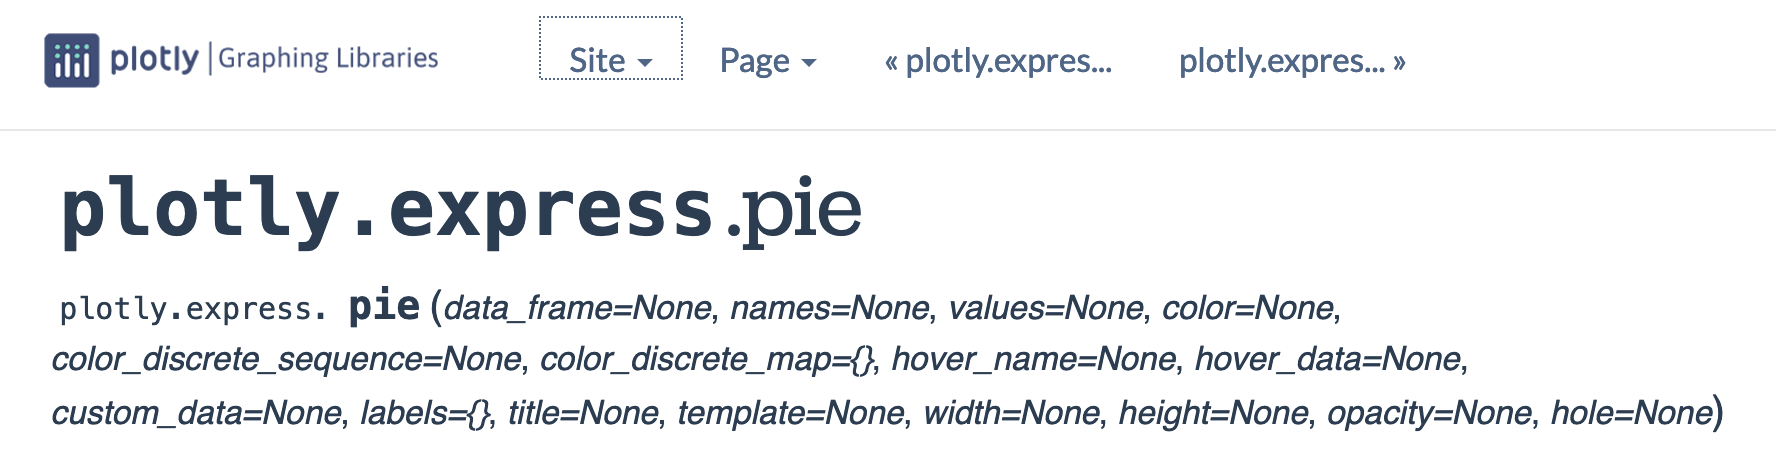

In [17]:
fig = px.pie(labels=ratings.index,
             values=ratings.values,
             title="Content Rating",
             names=ratings.index,
             )
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [18]:
fig = px.pie(
    labels=ratings.index,
    values=ratings.values,
    title="Content Rating",
    names=ratings.index,
    hole=0.6,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [19]:
df_apps_clean.Installs.describe()

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [20]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


In [ ]:
# We can remove the comma (,) character - or any character for that matter - from a DataFrame using the string’s .
# replace() method. Here we’re saying: “replace the , with an empty string”. This completely removes all the commas
# in the Installs column. We can then convert our data to a number using .to_numeric().

In [21]:
df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "")
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [22]:
df_apps_clean.Price.describe()

count     8199
unique      73
top          0
freq      7595
Name: Price, dtype: object

In [23]:
df_apps_clean.Price = df_apps_clean.Price.astype(str).str.replace('$', "")
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)
df_apps_clean.sort_values('Price', ascending=False).head(20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [24]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [25]:
# We can work out the highest grossing paid apps now. All we need to do is multiply the values in the price and the installs column to get the number:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [26]:
# We can find the number of different categories like so:
df_apps_clean.Category.nunique()

33

In [27]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

In [28]:
bar = px.bar(x = top10_category.index, y = top10_category.values) # index = category name
bar.show()

In [30]:
# What matters is not just the total number of apps in the category but how often apps are downloaded in that category. 
# This will give us an idea of how popular a category is. First, we have to group all our apps by category and sum the number of installations:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

In [31]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')
h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

In [ ]:
# Now we see that Games and Tools are actually the most popular categories. If we plot the popularity of a category next to 
# the number of apps in that category we can get an idea of how concentrated a category is. Do few apps have most of the downloads
# or are the downloads spread out over many apps?
# Create a DataFrame that has the number of apps in one column and the number of installs in another:
# Then use the plotly express examples from the documentation alongside the .scatter() API reference to create scatter plot that looks like the chart above.
# Hint: Use the size, hover_name and color parameters in .scatter().
# To scale the y-axis, call .update_layout() and specify that the y-axis should be on a log-scale like so: yaxis=dict(type='log')

In [32]:
cat_number = df_apps_clean.groupby('Category').agg({'App': pd.Series.count})
cat_number.head()

,App
Category,
ART_AND_DESIGN,61
AUTO_AND_VEHICLES,73
BEAUTY,42
BOOKS_AND_REFERENCE,169
BUSINESS,262


In [33]:
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'the dimension of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False)

the dimension of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


In [34]:
scatter = px.scatter(cat_merged_df, # data
                     x="App", #column name
                     y='Installs',
                     title='Category Concentration',
                     size='App',
                     hover_name=cat_merged_df.index,
                     color='Installs')
scatter.update_layout(xaxis_title='Number of Apps (Lower=More Concentrated',
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))
scatter.show()

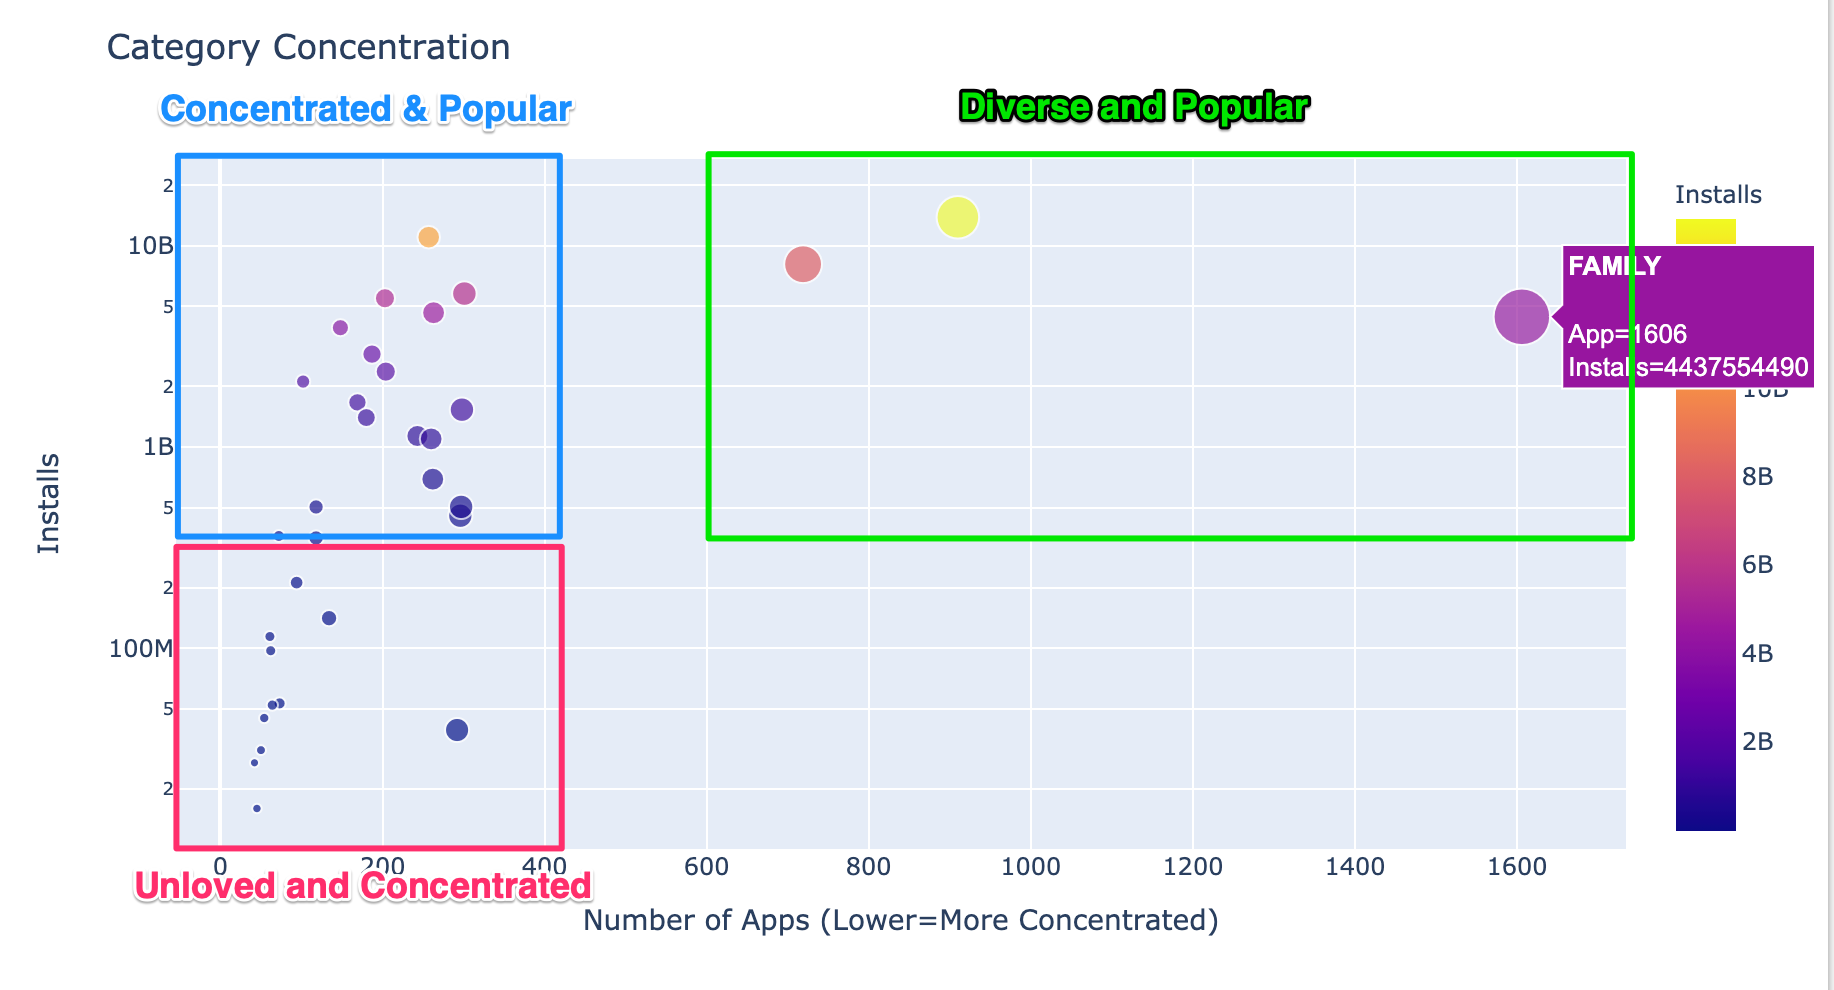

# Extracting Nested Column Data using .stack()

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [36]:
# Number of genres:
len(df_apps_clean.Genres.unique())

114

In [37]:
# Problem: Have multiple categories separated by:
df_apps_clean.Genres.value_counts().sort_values(ascending=True)[:5]

Lifestyle;Pretend Play      1
Strategy;Education          1
Adventure;Education         1
Role Playing;Brain Games    1
Tools;Education             1
Name: Genres, dtype: int64

In [38]:
# Split the strings on the semi-colon and then .stack them.
stack = df_apps_clean.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8564,)
Number of genres: 53


In [ ]:
# Try experimenting with the built-in colour scales in Plotly. You can find a full list:
# https://plotly.com/python/builtin-colorscales/

In [39]:
# Solution: Working with Colour Scales in Plotly
bar = px.bar(
    x= num_genres.index[:15], # index = category name
    y= num_genres.index[:15], # count
    title = 'Top Genres',
    hover_name = num_genres.index[:15],
    color = num_genres.values[:15],
    color_continuous_scale='Agsunset',
    )
bar.update_layout(
    xaxis_title='Genre',
    yaxis_title='Number of Apps',
    coloraxis_showscale=False,
    )
bar.show()

# Grouped Bar Charts and Box Plots with Plotly

In [40]:
# let’s see what the split is between free and paid apps.
df_apps_clean.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

In [42]:
# Using as_index=False we push all the data into columns rather than end up with our Categories as the index.
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
...,...,...,...
56,TRAVEL_AND_LOCAL,Paid,8
57,VIDEO_PLAYERS,Free,144
58,VIDEO_PLAYERS,Paid,4
59,WEATHER,Free,65


# Challenge: Contrasting Free vs. Paid Apps per Category

Use the plotly express bar chart examples and the .bar() API reference to create this bar chart:

See if you can figure out how to get the look above by changing the categoryorder to 'total descending' as outlined in the documentation: https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value

In [43]:
# The key is using the color and barmode parameters for the .bar() method. To get a particular order,
# you can pass a dictionary to the axis parameter in .update_layout().
g_bar = px.bar(
    df_free_vs_paid,
    x='Category',
    y='App',
    title='Free vs Paid Apps by Category',
    color='Type',
    barmode='group',
    )
g_bar.update_layout(
    xaxis_title='Category',
    yaxis_title='Number of Apps',
    xaxis={'categoryorder':'total descending'},
    yaxis=dict(type='log')
)
g_bar.show()

But this leads to many more questions:

How much should you charge? What are other apps charging in that category?

How much revenue could you make?

And how many downloads are you potentially giving up because your app is paid?



Let’s try and answer these questions with some Box plots. Box plots show us some handy descriptive statistics in a graph - things like the median value, the maximum value, the minimum value, and some quartiles.

Box Plots Guide: https://plotly.com/python/box-plots/

.box API: https://plotly.com/python-api-reference/generated/plotly.express.box.html

In [46]:
box = px.box(
    df_apps_clean,
    y='Installs',
    x='Type',
    color='Type',
    notched=True,
    points='all',
    title='How Many Downloads are Paid Apps Giving Up?',
    )

box.update_layout(yaxis=dict(type='log'))

box.show()

In [ ]:
# From the hover text in the chart, we see that the median number of downloads for free apps is 500,000, 
#while the median number of downloads for paid apps is around 5,000! This is massively lower.

# Challenge: App Revenue by Category

In [47]:
df_paid_apps = df_apps_clean[df_apps_clean['Type'] == 'Paid']
box = px.box(
    df_paid_apps,
    x='Category',
    y='Revenue_Estimate',
    title='How Much Can Paid Apps Earn?',
)

box.update_layout(
    xaxis_title='Category',
    yaxis_title='Paid App Ballpark Revenue',
    xaxis={'categoryorder':'min ascending'},
    yaxis=dict(type='log'),
)

box.show()

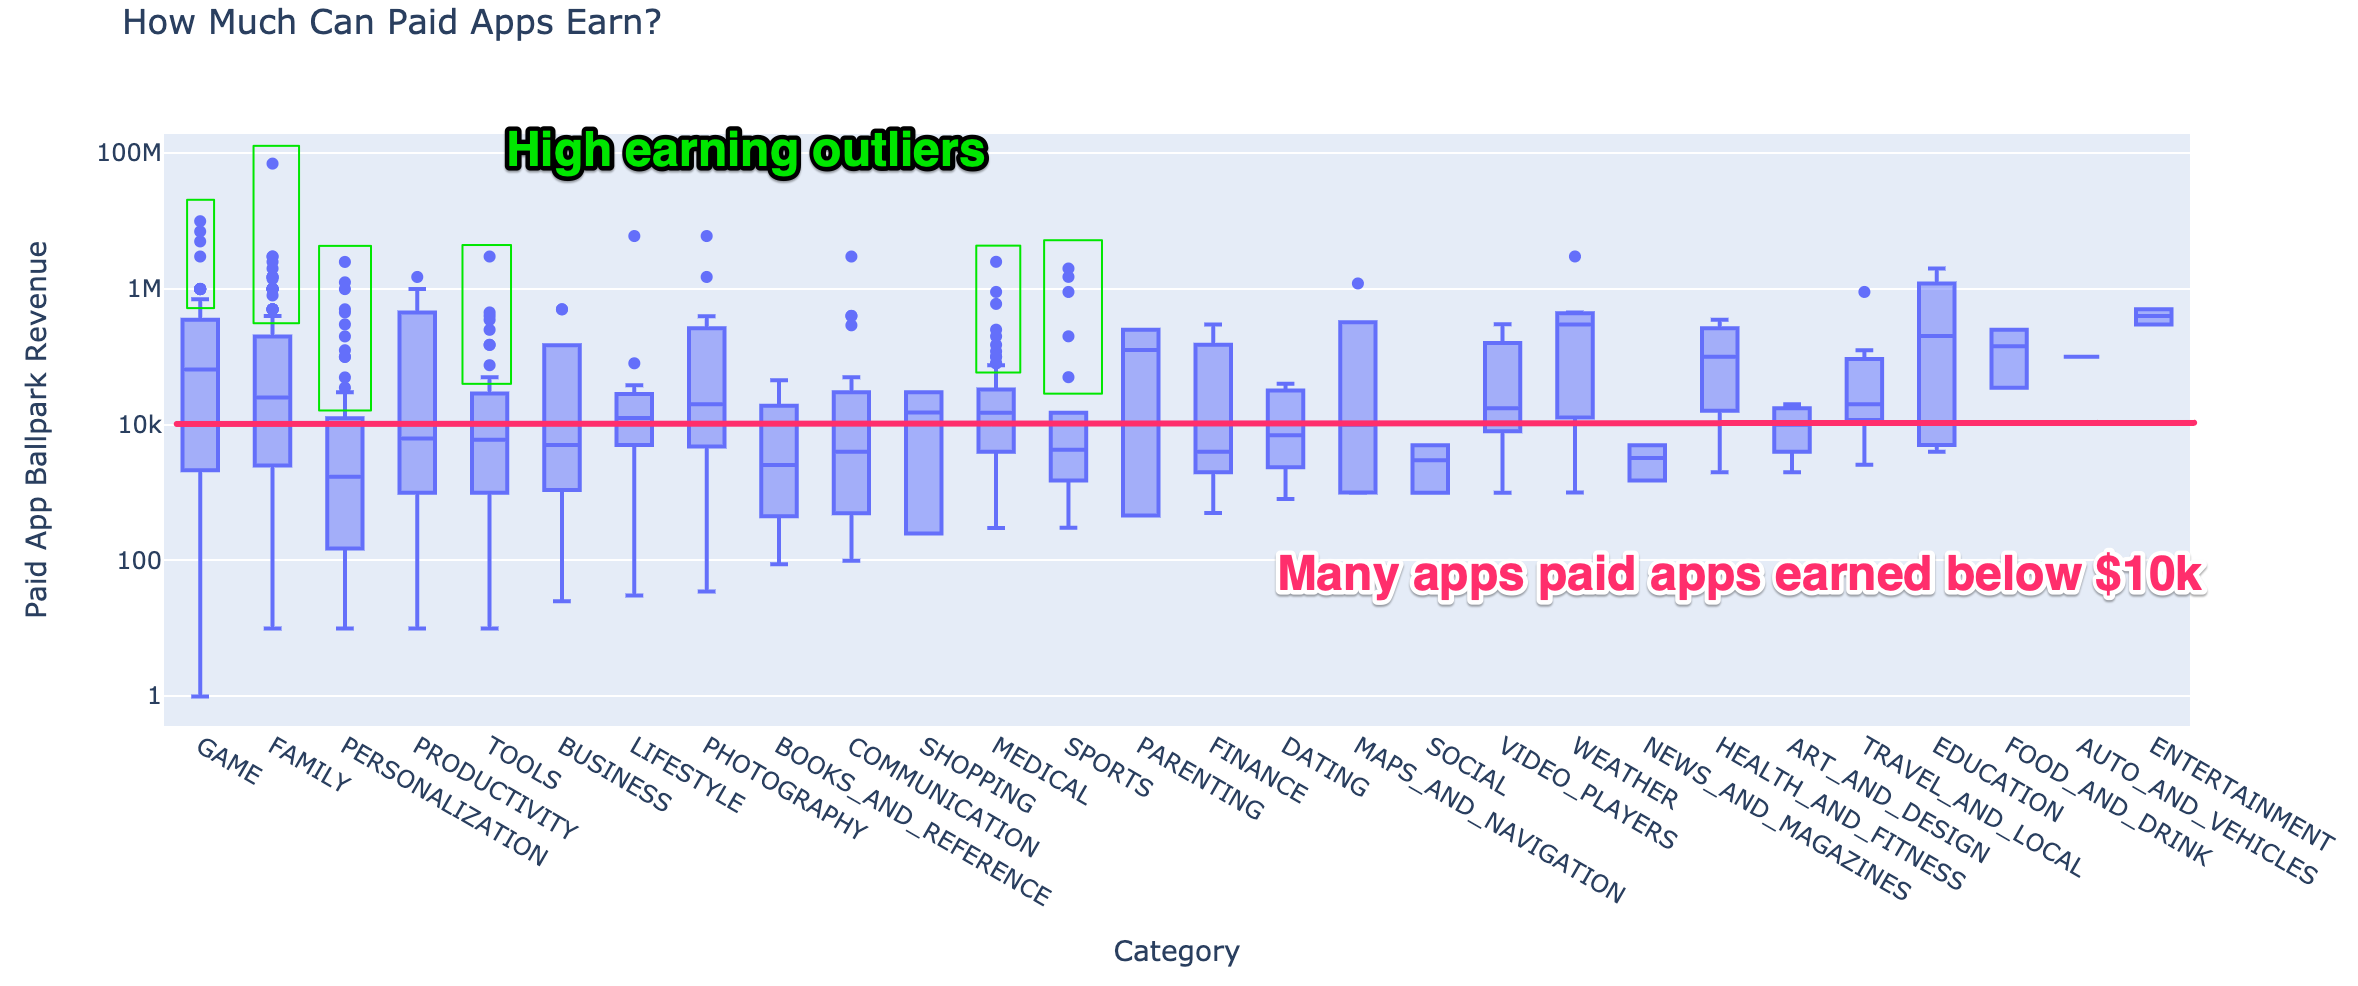

#Challenge: App Pricing by Category

In [48]:
box = px.box(
    df_paid_apps,
    x='Category',
    y='Price',
    title='Price per Category'
)

box.update_layout(
    xaxis_title='Category',
    yaxis_title='Paid App Price',
    xaxis={'categoryorder':'max descending'},
    yaxis=dict(type='log'),
    )

box.show()

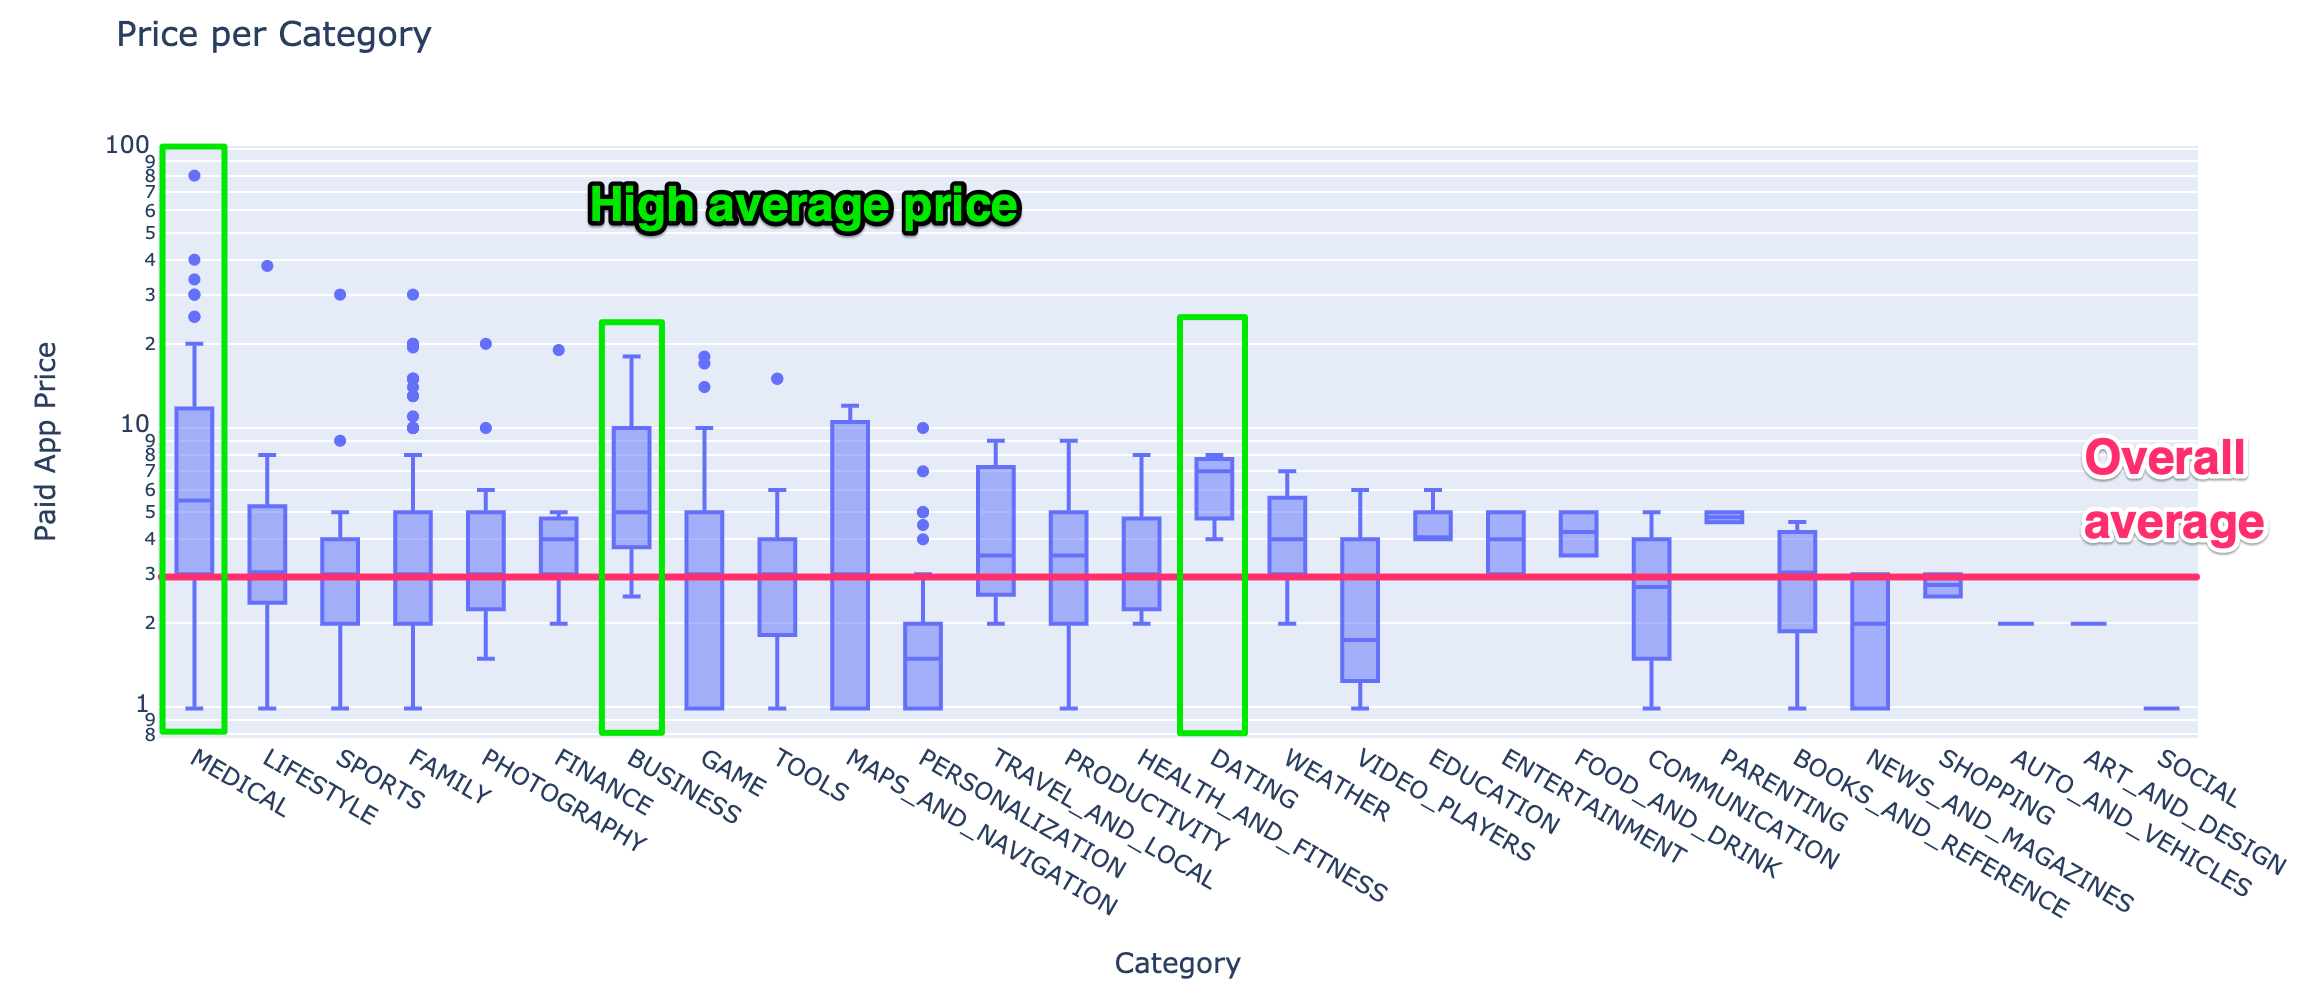